<a href="https://colab.research.google.com/github/sms06164/Python-DVD-rental-project/blob/main/Web_scraping_on_CBC_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html transformers

##This is a web scraping project on CBC news - Health




In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession
import requests
from bs4 import BeautifulSoup
from transformers import pipeline
import matplotlib.pyplot as plt

In [ ]:
def parse_elements(url,element):
    session=HTMLSession()
    r=session.get(url)
    elements=r.html.find(element)
    return elements

In [ ]:
url = 'https://www.cbc.ca/news/health'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

To extract the hyperlink of each news thread into 'links_list'

In [ ]:
link = 'https://www.cbc.ca/news/health/'
hyperlinks = parse_elements(link, 'a')

In [ ]:
# Print the string versions of the hyperlinks
links_list = []
for hyperlink in hyperlinks:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count('https://www.cbc.ca/news/health/') > 0:
        #print("count is greater")
        if (hyperlink.absolute_links).pop() not in links_list:
          #print('not in list')
          links_list.append(((hyperlink.absolute_links).pop()))
          print((hyperlink.absolute_links).pop())


def get_threads(webdata,name):
  for hyperlink in webdata:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count(f'/r/{name}/comments') > 0:
        print((hyperlink.absolute_links).pop())
      #let's add some code to add each hyperlink to a list!
      #then we can add the list to a dictionary and make it a pandas dataframe

https://www.cbc.ca/news/health/alzheimers-drug-promise-approval-1.6908896
https://www.cbc.ca/news/health/cats-poland-bird-flu-1.6908798
https://www.cbc.ca/news/health/united-states-over-counter-birth-control-approval-1.6905541
https://www.cbc.ca/news/health/prime-energy-drink-recall-canada-1.6904892
https://www.cbc.ca/news/health/bmi-measure-health-weight-1.6903455
https://www.cbc.ca/news/health/prime-energy-cafffeine-health-canada-1.6901902
https://www.cbc.ca/news/health/covid-19-vaccine-update-fall-booster-1.6903490
https://www.cbc.ca/news/health/covid-19-wastewater-canada-data-1.6896416
https://www.cbc.ca/news/health/hpv-shot-dose-1.6900072
https://www.cbc.ca/news/health/alzheimers-drug-leqembi-fda-approval-1.6900255
https://www.cbc.ca/news/health/africa-malaria-vaccines-1.6897687


In [ ]:
print(links_list)

['https://www.cbc.ca/news/health/alzheimers-drug-promise-approval-1.6908896', 'https://www.cbc.ca/news/health/cats-poland-bird-flu-1.6908798', 'https://www.cbc.ca/news/health/united-states-over-counter-birth-control-approval-1.6905541', 'https://www.cbc.ca/news/health/prime-energy-drink-recall-canada-1.6904892', 'https://www.cbc.ca/news/health/bmi-measure-health-weight-1.6903455', 'https://www.cbc.ca/news/health/prime-energy-cafffeine-health-canada-1.6901902', 'https://www.cbc.ca/news/health/covid-19-vaccine-update-fall-booster-1.6903490', 'https://www.cbc.ca/news/health/covid-19-wastewater-canada-data-1.6896416', 'https://www.cbc.ca/news/health/hpv-shot-dose-1.6900072', 'https://www.cbc.ca/news/health/alzheimers-drug-leqembi-fda-approval-1.6900255', 'https://www.cbc.ca/news/health/africa-malaria-vaccines-1.6897687']


In [ ]:
threads_dictionary = {}

#To extract the passage of each hyperlink and place them into a dictionary.


In [ ]:
for link in links_list:
    # Fetch the HTML content from the link
    response = requests.get(link)
    content = response.text

    # Create a BeautifulSoup object to parse the content
    soup = BeautifulSoup(content, "html.parser")

    # Find the passage or body element and extract its text
    body_element = soup.find('div', class_='story')

    if body_element:
        # The body element is found, extract its text
        passage = body_element.get_text()
        # Do whatever you want with the extracted passage (e.g., print it)
        print(f"Passage from {link}:")
        print(passage)
        print("\n")
        threads_dictionary[link] = passage
    else:
        print(f"No body element found for {link}\n")



        #how to append the passage with its link into the following dictionary
#threads_dictionary = {}

Passage from https://www.cbc.ca/news/health/alzheimers-drug-promise-approval-1.6908896:
Another experimental Alzheimer's drug can modestly slow patients' inevitable worsening — by about four to seven months, researchers reported Monday.Eli Lilly and Co. is seeking U.S. Food and Drug Administration (FDA) approval of donanemab. If cleared, it would be only the second Alzheimer's treatment convincingly shown to delay the mind-robbing disease, after the recently approved Leqembi from Japanese drugmaker Eisai."Finally there's some hope, right, that we can talk about," Lilly's Dr. John Sims told reporters Monday at the Alzheimer's Association International Conference in Amsterdam."We don't cure the disease," he said. "Diabetes doesn't have a cure either. It doesn't mean you can't have very meaningful treatments for patients."Lilly announced in May that donanemab appeared to work, but on Monday the full results of a study of 1,700 patients were published by the Journal of the American Medical

#To apply a NLP model from Huggingface for topic analysis of the news threads. The top two related topics of the news will be listed out.

In [ ]:
pipe = pipeline("zero-shot-classification")
candidate_labels= [
    "mental health",
    "cancer",
    "research",
    "pediatric",
    "covid19",
    "pharmaceutical",
    "government"
]

link_category = {}
for link, passage in threads_dictionary.items():
  output = pipe(
      passage,
      candidate_labels=candidate_labels
      )
  print(passage[:200])
  print(output['labels'])
  print(output['scores'])
  print('---')
  link_category[link] = output['labels'][:2]

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Another experimental Alzheimer's drug can modestly slow patients' inevitable worsening — by about four to seven months, researchers reported Monday.Eli Lilly and Co. is seeking U.S. Food and Drug Admi
['research', 'pharmaceutical', 'government', 'pediatric', 'mental health', 'covid19', 'cancer']
[0.23359926044940948, 0.23319695889949799, 0.1362665444612503, 0.12950827181339264, 0.11390358209609985, 0.09777923673391342, 0.05574610456824303]
---
The World Health Organization said more than two dozen cats have been infected with bird flu across Poland, but no people appeared to have been sickened.In a statement on Monday, the UN health agency 
['covid19', 'research', 'government', 'pharmaceutical', 'mental health', 'pediatric', 'cancer']
[0.2708488404750824, 0.2536048889160156, 0.13900110125541687, 0.12436752021312714, 0.11240595579147339, 0.06959835439920425, 0.030173353850841522]
---
Federal regulators on Thursday approved the nation's first over-the-counter birth control pill in a land

In [ ]:
link_category

{'https://www.cbc.ca/news/health/alzheimers-drug-promise-approval-1.6908896': ['research',
  'pharmaceutical'],
 'https://www.cbc.ca/news/health/cats-poland-bird-flu-1.6908798': ['covid19',
  'research'],
 'https://www.cbc.ca/news/health/united-states-over-counter-birth-control-approval-1.6905541': ['pharmaceutical',
  'mental health'],
 'https://www.cbc.ca/news/health/prime-energy-drink-recall-canada-1.6904892': ['research',
  'mental health'],
 'https://www.cbc.ca/news/health/bmi-measure-health-weight-1.6903455': ['mental health',
  'research'],
 'https://www.cbc.ca/news/health/prime-energy-cafffeine-health-canada-1.6901902': ['pediatric',
  'mental health'],
 'https://www.cbc.ca/news/health/covid-19-vaccine-update-fall-booster-1.6903490': ['mental health',
  'covid19'],
 'https://www.cbc.ca/news/health/covid-19-wastewater-canada-data-1.6896416': ['mental health',
  'government'],
 'https://www.cbc.ca/news/health/hpv-shot-dose-1.6900072': ['mental health',
  'research'],
 'https://ww

A bar chart shows the CBC health news articles by categories.

In [ ]:
category_count = {category: 0 for category in candidate_labels}
for link, categories in link_category.items():
  for category in categories:
    category_count[category] += 1

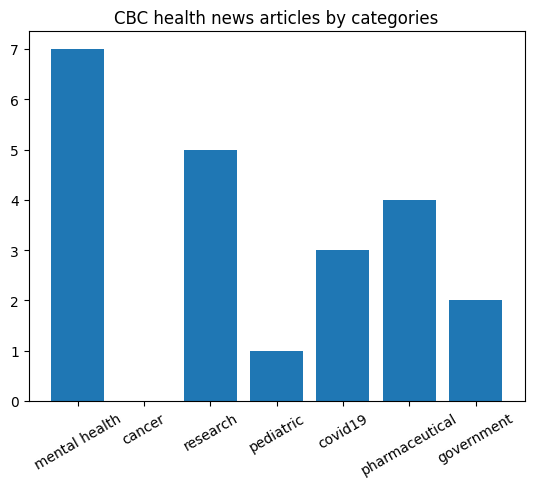

In [ ]:
plt.bar(
    list(category_count.keys()),
    list(category_count.values())
)
plt.xticks(rotation=30)
plt.title('CBC health news articles by categories')
plt.show()